<a href="https://colab.research.google.com/github/akilchen/pandas_exercise/blob/main/CH07_%E7%94%A8Boolean_Series%E7%AF%A9%E9%81%B8%E7%89%B9%E5%AE%9A%E8%B3%87%E6%96%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **7.1 計算Boolean Series的統計資訊(製作Boolean Series)**

先對DataFrame的其中一個欄位進行條件判斷，進而得到boolean Series，再從中摘要出統計資訊。

01 讀取movie.csv,設定movie_title為index,篩選出duration欄位

In [ ]:
movie = pd.read_csv('/content/drive/MyDrive/Pandas/data/movie.csv',index_col='movie_title')
movie[['duration']].head(10)

,duration
movie_title,
Avatar,178.0
Pirates of the Caribbean: At World's End,169.0
Spectre,148.0
The Dark Knight Rises,164.0
Star Wars: Episode VII - The Force Awakens,NaN
John Carter,132.0
Spider-Man 3,156.0
Tangled,100.0
Avengers: Age of Ultron,141.0


02 找出哪些電影時常大於兩個小時的。<br>
(註:duration是以分鐘為單位)

In [ ]:
movie_2_hours = movie['duration'] > 120  #這時的
movie_2_hours.head(10)
#現在的movie_2_hours還是一個長度和movie一樣的一個boolean Series，不是篩選過後的1039個。

,duration
movie_title,
Avatar,True
Pirates of the Caribbean: At World's End,True
Spectre,True
The Dark Knight Rises,True
Star Wars: Episode VII - The Force Awakens,False
John Carter,True
Spider-Man 3,True
Tangled,False
Avengers: Age of Ultron,True


03 因為boolean中的True和False對應的是1和0,所以用SUM()算出超過兩小時的影片數

In [ ]:
movie_2_hours.sum()
#現在的movie_2_hours還是一個長度和movie一樣的一個boolean Series，不是篩選過後的1039個。

np.int64(1039)

04 算出超過2小時電影占所有電影的百分比，使用mean()*100<br>
(True的數量/總電影數量)X100

In [ ]:
movie_2_hours.mean()*100

np.float64(21.13506916192026)

05 duration存在missing value,所以要刪除missing value

In [ ]:
movie['duration'].dropna().gt(120).mean()*100

np.float64(21.199755152009793)

了解更多1:如果想比照mean()傳回True的百分比，可以使用value_counts找出no missing value的數量，同時將normalize設為True，會傳回True和False的百分比

In [ ]:
(movie['duration'].dropna()
         .gt(120)  #產生boolean series
         .value_counts(normalize=True))#True的數量

,proportion
duration,
False,0.788002
True,0.211998


了解更多2:比較同一個DataFrame的兩個欄位生成boolean Series<br>
在每部電影中，演員1的按讚數比演員2的按讚數高的比例。

In [ ]:
actors = movie[['actor_1_facebook_likes','actor_2_facebook_likes']].dropna() #取出相關欄位，移除missing value
(actors['actor_1_facebook_likes']>actors['actor_2_facebook_likes']).mean()

np.float64(0.9777687130328371)

# **7.2 設定多個boolean條件**

01 讀取movie.csv,設定movie_title為index

In [ ]:
movie = pd.read_csv('/content/drive/MyDrive/Pandas/data/movie.csv',index_col='movie_title')

02 運用boolean建構多個filter,儲存成不同變數。

In [ ]:
criteral1 = movie.imdb_score > 8
criteral2 = movie.content_rating =='PG-13'
criteral3 = ((movie.title_year < 2000) | (movie.title_year > 2009)) #括號是強迫先算，若想要結合兩個boolean Series,則需將個別運算式包起來

03 將所有filter整合成單一boolean Series

In [ ]:
criteral_final = criteral1&criteral2&criteral3 #利用&結合多個過濾器
criteral_final.head()

,0
movie_title,
Avatar,False
Pirates of the Caribbean: At World's End,False
Spectre,False
The Dark Knight Rises,True
Star Wars: Episode VII - The Force Awakens,False


# **7.3 設定篩選條件**

01 讀取movie.csv,設定movie_title為index，然後篩選出imdb_score大於8、content_rating是PG-13，上映年度為2000年以前或2009年以後的電影。

In [ ]:
movie = pd.read_csv('/content/drive/MyDrive/Pandas/data/movie.csv',index_col='movie_title')
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating =='PG-13'
crit_a3 = ((movie.title_year < 2000) | (movie.title_year > 2009)) #括號是強迫先算，若想要結合兩個boolean Series,則需將個別運算式包起來
final_crit_a = crit_a1 & crit_a2 & crit_a3 #利用&結合多個篩選

02 設定第2個篩選器。篩選出imdb_score小於5、content_rating是R，上映年度為2000年以前或2010年以後的電影。

In [ ]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year < 2000) | (movie.title_year > 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

03 結合兩個篩選器，讓兩個篩選結果只要符合一個就顯示True

In [ ]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

,0
movie_title,
Avatar,False
Pirates of the Caribbean: At World's End,False
Spectre,False
The Dark Knight Rises,True
Star Wars: Episode VII - The Force Awakens,False


04 用建立好boolean Series後，列出符合條件的電影。

In [ ]:
movie[final_crit_all]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Lovers,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Graduation Day,Color,Herb Freed,78.0,96.0,5.0,180.0,Carmen Argenziano,431.0,NaN,Horror|Mystery,...,58.0,English,USA,R,250000.0,1981.0,338.0,4.5,1.85,249
The Canyons,Color,Paul Schrader,162.0,99.0,261.0,461.0,Gus Van Sant,924.0,49494.0,Drama|Thriller,...,87.0,English,USA,R,250000.0,2013.0,835.0,3.9,2.35,0
Butterfly,Color,Matt Cimber,15.0,108.0,32.0,180.0,June Lockhart,602.0,NaN,Crime|Drama,...,18.0,English,USA,R,NaN,1982.0,427.0,4.5,1.85,76


05 也可以用loc生成相同結果

In [ ]:
movie.loc[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Lovers,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000


06 我們還可以使用loc來指定在條件中要輸出的欄位，以檢查結果是否有符合我們一剛開始所設定的條件。

In [ ]:
cols = ['imdb_score','content_rating','title_year']
movie_filtered = movie.loc[final_crit_all,cols]
movie_filtered.head()

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Lovers,4.5,R,2015.0
Guardians of the Galaxy,8.1,PG-13,2014.0


In [ ]:
for col in movie_filtered.columns:
  print(f"{col}唯一值=")
  print(sorted(movie_filtered[col].unique()))
  print("-----------------------")

imdb_score唯一值=
[np.float64(2.2), np.float64(2.6), np.float64(3.1), np.float64(3.2), np.float64(3.3), np.float64(3.4), np.float64(3.5), np.float64(3.6), np.float64(3.7), np.float64(3.8), np.float64(3.9), np.float64(4.0), np.float64(4.1), np.float64(4.2), np.float64(4.3), np.float64(4.4), np.float64(4.5), np.float64(4.6), np.float64(4.7), np.float64(4.8), np.float64(4.9), np.float64(8.1), np.float64(8.2), np.float64(8.3), np.float64(8.4), np.float64(8.5), np.float64(8.6), np.float64(8.7), np.float64(8.8)]
-----------------------
content_rating唯一值=
['PG-13', 'R']
-----------------------
title_year唯一值=
[np.float64(1968.0), np.float64(1977.0), np.float64(1980.0), np.float64(1981.0), np.float64(1982.0), np.float64(1983.0), np.float64(1985.0), np.float64(1987.0), np.float64(1989.0), np.float64(1990.0), np.float64(1991.0), np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2010.0), np.float64(20

了解更多:iloc不支援Series,但numpy支援，所以可以先利用to_numpy轉換成Numpy Series

In [ ]:
movie.iloc[final_crit_all.to_numpy()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Lovers,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Graduation Day,Color,Herb Freed,78.0,96.0,5.0,180.0,Carmen Argenziano,431.0,NaN,Horror|Mystery,...,58.0,English,USA,R,250000.0,1981.0,338.0,4.5,1.85,249
The Canyons,Color,Paul Schrader,162.0,99.0,261.0,461.0,Gus Van Sant,924.0,49494.0,Drama|Thriller,...,87.0,English,USA,R,250000.0,2013.0,835.0,3.9,2.35,0
Butterfly,Color,Matt Cimber,15.0,108.0,32.0,180.0,June Lockhart,602.0,NaN,Crime|Drama,...,18.0,English,USA,R,NaN,1982.0,427.0,4.5,1.85,76


# **7.4 布林選取VS索引選取**

用college.csv資料去選出TX(德州)的所有大學

01 讀取college.csv,選出TX(德州)的所有大學

In [ ]:
college = pd.read_csv('/content/drive/MyDrive/Pandas/data/college.csv')
college[college['STABBR'] == 'TX'].head() #STABBR=大學所在的州

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


02 改用index進行篩選，先將STABBR(所在的州)設為index。然後，用loc來選取index=TX的列

In [ ]:
#設定index
college2 = college.set_index('STABBR')
#用loc來選取index=TX的列
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


03 比較以上兩個方法的時間

In [ ]:
#使用%timeit測量boolean篩選所需時間
%timeit college[college['STABBR'] == 'TX']

2.11 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#使用%timeit測量index篩選所需時間
%timeit college2.loc['TX']

587 µs ± 127 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


結果:index篩選比較快!

04 雖然index篩選比較快，但是設定index也需要花時間，所以一併考量

In [ ]:
%timeit college2 = college.set_index('STABBR')

1.12 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


結論:用boolean選取

了解更多:選取所在州為TX(德州)、CA(加州)和NY(紐約)的大學名單

In [ ]:
#建一個需要的list
states = ['TX','CA','NY']
#使用isin()傳回一個boolean series
college[college['STABBR'].isin(states)]

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528,WestMed College - Merced,Merced,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,15623.5
7529,Vantage College,El Paso,TX,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7530,SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7533,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


# **7.5 用已排序的index來select資料**

當index是唯一值或已排序時，index select效能會提升。上一節例子會比較慢的原因是因為index沒有排序，所以速度比較慢。

01 讀取college.csv,並指定STABRR為index。用is_monotonic_increasing檢查index是否已經過排序。<br>(is_monotonic_increasing正序,is_monotonic_descreasing反序)

In [ ]:
college = pd.read_csv('/content/drive/MyDrive/Pandas/data/college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic_increasing

False

02 index沒經過排序，那就排序吧(sort_index是使用binary search)

In [ ]:
college3 = college2.sort_index()
college3.index.is_monotonic_increasing

True

03 利用不同select方式(boolean和index)選出在TX的大學，並計算所需時間

In [ ]:
#使用boolean select
%timeit college[college['STABBR'] == 'TX']

1.11 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#使用index select(無sort)
%timeit college2.loc['TX']

452 µs ± 9.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#使用index select(有sort)
%timeit college3.loc['TX']

59.8 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
a = 452/ 59.8
print(f'{a}µs')

7.558528428093646µs


在已sort過的DataFrame做排序，比沒有sort快了7.5倍。

04 測試**index不重複**的情形，使用INSTNM(機構名稱)作為index

In [ ]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique #確定INSTNM是否不重複

True

05 用boolean選出"Stanford University"的資料(會是一個DataFrame)

In [ ]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


06 用index選出"Stanford University"的資料(會是一個Series)

In [ ]:
college_unique.loc['Stanford University']

,Stanford University
CITY,Stanford
STABBR,CA
HBCU,0.0
MENONLY,0.0
WOMENONLY,0.0
RELAFFIL,0
SATVRMID,730.0
SATMTMID,745.0
DISTANCEONLY,0.0
UGDS,7018.0


07 如果要用index選出DataFrame的話，就需要將index label放入list，再傳到loc中

In [ ]:
college_unique.loc[['Stanford University']]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


08 計算用兩個作法所花費的時間

In [ ]:
#用boolean所花費的時間
%timeit college[college['INSTNM'] == 'Stanford University']

1.13 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#用index所花費的時間
%timeit college_unique.loc[['Stanford University']]

491 µs ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
b = 1130/491
print(f'{b}us')

2.30142566191446us


比boolean快了2.3倍

# **7.6 利用Pandas實現SQL中的功能**

### Task:找出所有在警察或消防部門工作，同時基本年薪在8萬~12萬美元的女性員工。

01 讀取employee.csv

In [ ]:
employee = pd.read_csv('/content/drive/MyDrive/Pandas/data/employee.csv')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


02 調查DataFrame相關內容

確定這個DataFrame的列數。

In [ ]:
employee.shape[0]

2000

各欄位的DataType

In [ ]:
employee.dtypes

,0
UNIQUE_ID,int64
POSITION_TITLE,object
DEPARTMENT,object
BASE_SALARY,float64
RACE,object
EMPLOYMENT_TYPE,object
GENDER,object
EMPLOYMENT_STATUS,object
HIRE_DATE,object
JOB_DATE,object


查看DEPARTMENT、GENDER下面的類別有的類別及數量

In [ ]:
for col in ['DEPARTMENT','GENDER']:
  print(f"{col}唯一值=")
  print(sorted(employee[col].unique()))
  print("-----------------------")

DEPARTMENT唯一值=
['Admn. & Regulatory Affairs', "City Controller's Office", 'City Council', 'Convention and Entertainment', 'Dept of Neighborhoods (DON)', 'Finance', 'Fleet Management Department', 'General Services Department', 'Health & Human Services', 'Housing and Community Devp.', 'Houston Airport System (HAS)', 'Houston Emergency Center (HEC)', 'Houston Fire Department (HFD)', 'Houston Information Tech Svcs', 'Houston Police Department-HPD', 'Human Resources Dept.', 'Legal Department', 'Library', "Mayor's Office", 'Municipal Courts Department', 'Parks & Recreation', 'Planning & Development', 'Public Works & Engineering-PWE', 'Solid Waste Management']
-----------------------
GENDER唯一值=
['Female', 'Male']
-----------------------


In [ ]:
employee.DEPARTMENT.value_counts()

,count
DEPARTMENT,
Houston Police Department-HPD,638
Houston Fire Department (HFD),384
Public Works & Engineering-PWE,343
Health & Human Services,110
Houston Airport System (HAS),106
Parks & Recreation,74
Solid Waste Management,43
Library,36
Fleet Management Department,36


In [ ]:
employee.GENDER.value_counts()

,count
GENDER,
Male,1397
Female,603


In [ ]:
employee['GENDER'].value_counts(normalize=True)

,proportion
GENDER,
Male,0.6985
Female,0.3015


確定Base_Salary的最小值和最大值(用describe做四分位數)

In [ ]:
employee.BASE_SALARY.describe()

,BASE_SALARY
count,1886.000000
mean,55767.931601
std,21693.706679
min,24960.000000
25%,40170.000000
50%,54461.000000
75%,66614.000000
max,275000.000000


03 建立篩選

In [ ]:
#建立篩選
depts = employee.DEPARTMENT.isin(['Houston Police Department-HPD','Houston Fire Department (HFD)'])
gender = employee.GENDER == 'Female'
salary = employee.BASE_SALARY.between(80000,120000)
#把條件結合起來
select = depts & gender & salary
#檢視篩選出來的欄位和資料
select_columns = ['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']  #從DataFrame篩選出來要的欄位
employee.loc[select,select_columns].head() #要資料

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


# **7.7 使用query方法解決上一節的任務**

01 讀取employee.csv的檔案，指定部門類型，將篩選條件的有關欄位名稱存進select_column list中。

In [ ]:
employee01 = pd.read_csv('/content/drive/MyDrive/Pandas/data/employee.csv')
select_columns = ['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']
employee01.DEPARTMENT.apply(lambda x: True if x in depts else False) #用series篩選出DEPARTMENT是否含有depts

,DEPARTMENT
0,False
1,False
2,False
3,False
4,False
...,...
1995,False
1996,False
1997,False
1998,False


02 建立並執行query()

In [ ]:
qs = "DEPARTMENT in ['Houston Police Department-HPD','Houston Fire Department (HFD)']" \
    "and GENDER == 'Female'" \
    "and (BASE_SALARY >= 80000) and (BASE_SALARY <= 120000)"
emp_filtered = employee01.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


# **7.8 使用where()維持Series大小**

where():將不符合條件的直設為缺失值或其他值，而非直接將他們丟棄(just like 99.999)

任務:將boolean條件傳入where()，為movie.csv中actor_1_facebook_likes的值設定上下限。

01 讀取movie.csv,指定movie_title為index,然後刪除actor_1_facebook_likes欄位中的missing value

In [60]:
movie = pd.read_csv('/content/drive/MyDrive/Pandas/data/movie.csv',index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

,actor_1_facebook_likes
movie_title,
Avatar,1000.0
Pirates of the Caribbean: At World's End,40000.0
Spectre,11000.0
The Dark Knight Rises,27000.0
Star Wars: Episode VII - The Force Awakens,131.0


02 了解資料分布狀況

In [61]:
fb_likes.describe()

,actor_1_facebook_likes
count,4909.000000
mean,6494.488491
std,15106.986884
min,0.000000
25%,607.000000
50%,982.000000
75%,11000.000000
max,640000.000000


03 用視覺化的方式查看分布情形

<Axes: >

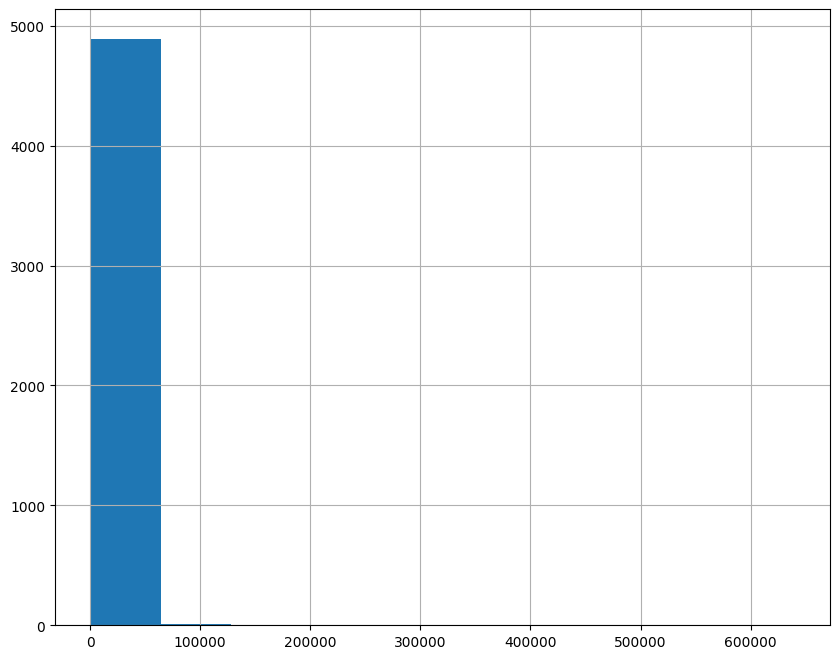

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fb_likes.hist(ax = ax)

很難看出資料分布情形，另位describe也透露出資料有向右傾斜(mean>median)的狀況。

04 看fb_likes中，有多少百分比的值<20000

In [63]:
c_high = fb_likes < 20000
c_high.mean()*100

np.float64(90.85353432470971)

05 使用where()並傳入步驟4的c_high(boolean series),此時預設傳回與Series相同大小的Series,且對應False的資料都會替換成NaN

In [64]:
fb_likes.where(c_high).head()

,actor_1_facebook_likes
movie_title,
Avatar,1000.0
Pirates of the Caribbean: At World's End,NaN
Spectre,11000.0
The Dark Knight Rises,NaN
Star Wars: Episode VII - The Force Awakens,131.0


where()的other參數可以用來換False。

06 將False的值換成20000

In [65]:
fb_likes.where(c_high,other=20000).head() #將不符條件的值換成20000

,actor_1_facebook_likes
movie_title,
Avatar,1000.0
Pirates of the Caribbean: At World's End,20000.0
Spectre,11000.0
The Dark Knight Rises,20000.0
Star Wars: Episode VII - The Force Awakens,131.0


07 設定下限，將低於300的值替換為300

In [67]:
c_low = fb_likes > 300 #先選出來那些要保留不需替換的值，剩下的就是需要替換的值
fb_likes_cap = fb_likes.where(c_high,other=20000).where(c_low,other=300) #變更需要替換的值
fb_likes_cap.head()

,actor_1_facebook_likes
movie_title,
Avatar,1000.0
Pirates of the Caribbean: At World's End,20000.0
Spectre,11000.0
The Dark Knight Rises,20000.0
Star Wars: Episode VII - The Force Awakens,300.0


08 檢查原始的Series和修改後的Series是否相同

In [68]:
len(fb_likes),len(fb_likes_cap)

(4909, 4909)

09 使用修改後的Series建立直方圖。

<Axes: >

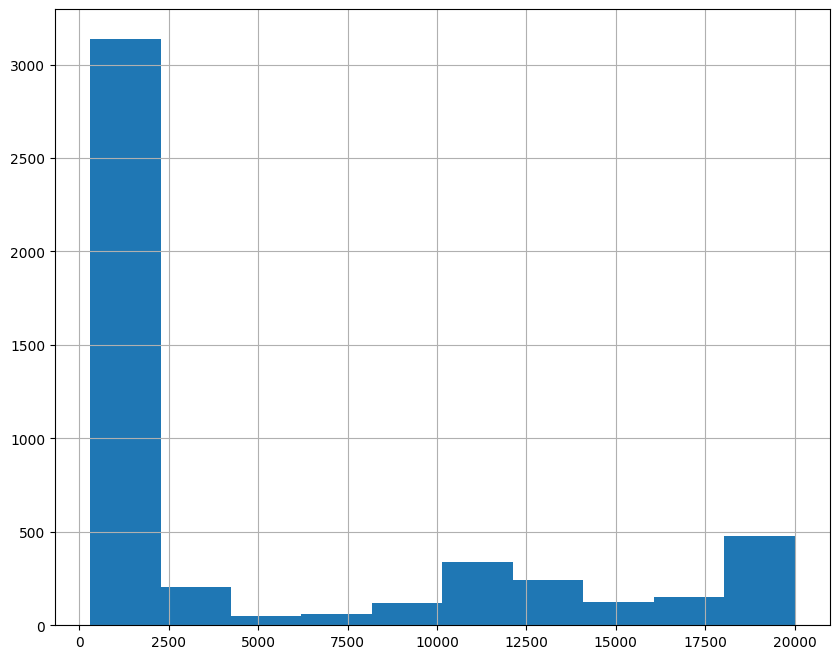

In [69]:
fig,ax = plt.subplots(figsize=(10,8))
fb_likes_cap.hist(ax=ax)

當我們位資料範圍設定上下限後，即可畫出更符合資料分布情形的結果圖。

# **7.9 對DataFrame的列進行遮罩(mask)**

mask() = 遮罩的意思，將True的那一列所有項目改成NaN(缺失值)

任務:遮掉資料集中所有title_year在2010之後，或title_year為missing value的列

01 讀取movie.csv檔，將movie_title設為index,同時設定mask條件

In [72]:
movie = pd.read_csv('/content/drive/MyDrive/Pandas/data/movie.csv',index_col='movie_title')
c1 = movie.title_year >= 2010
c2 = movie.title_year.isna()
c = c1 | c2

02 將series傳給mask，將Ture的資料遮掉

In [73]:
movie.mask(c).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


03 用drop.na刪掉有NaN的列

In [75]:
movie_mask = movie.mask(c).dropna(how='all')  #how='all' = 消除所有欄位都是NaN的列(如果how='any'，代表有任意欄位缺是就會刪掉這個列)
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


04 用[]執行相同的程序，檢查不同做法的結果是否一致

In [76]:
#使用[]建立布林Series
movie_boolean = movie[movie['title_year']<2010]
#檢查剛剛的movie_mask是否等於movie_boolean
movie_mask.equals(movie_boolean)

False

不相等，有地方出錯了。

05 先檢查他們的shape是否相同

In [77]:
movie_mask.shape==movie_boolean.shape

True

06 檢查各欄位的dtypes是否相等。<br>
原因:mask所產生的NaN，資料類型是float,因此有int的類型都會變成float。<br>
如果欄位的dtypes不同，則equals()也會傳回False。

In [78]:
movie_mask.dtypes == movie_boolean.dtypes

,0
color,True
director_name,True
num_critic_for_reviews,True
duration,True
director_facebook_likes,True
actor_3_facebook_likes,True
actor_2_name,True
actor_1_facebook_likes,True
gross,True
genres,True


07 除此之外，pandas也提供了testing module,用來檢查Series或DF的資料相等性，無須同時檢查型別相等性。

In [81]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_mask,movie_boolean, check_dtype=False)

若兩個DF資料內容相等，就不會顯示任何輸出，反之則會引發錯誤訊息。

"mask方法遮掉有缺失的列"及"使用series進行過濾"兩種方法的之間的速度差異如下:

In [82]:
%timeit movie.mask(c).dropna(how='all')

14.3 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
%timeit movie[movie['title_year']<2010]

993 µs ± 29.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# **7.10 以boolean series,loc與label選擇資料**

01 讀取movie.csv檔，將movie_title設為index。<br>
建立一個boolean Series來篩選content_rating為G且IMDB分數小於4的電影

In [84]:
movie = pd.read_csv('/content/drive/MyDrive/Pandas/data/movie.csv',index_col='movie_title')
c1 = movie.content_rating == 'G'
c2 = movie.imdb_score < 4
c = c1 & c2

02 將c傳給loc過濾列

In [85]:
movie_loc = movie.loc[c]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


03 檢查上面用loc的和直接用[]的結果是否相等

In [88]:
movie_loc.equals(movie[c])

True

04 用iloc進行相同的boolean index

In [89]:
movie_iloc= movie.iloc[c]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

boolean具有index,所以不能直接傳給iloc

05 利用to_numpy將c轉成numpy陣列，就可以用iloc選取資料

In [92]:
movie_iloc = movie.iloc[c.to_numpy()]
movie_iloc.equals(movie_loc)

True

06 使用Series選取特定欄位。選擇出資料型態為int64的欄位

In [93]:
c_col = movie.dtypes == np.int64
c_col.head()

,0
color,False
director_name,False
num_critic_for_reviews,False
duration,False
director_facebook_likes,False


In [94]:
movie.loc[:,c_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0
